# Introduction

Tidak jarang disuatu e-commerce metode pelanggan yang sering digunakan oleh pengguna adalah dengan kartu kredit. Dengan menganalisis menggunakan dataset yang telah kita miliki yang didalamnya berisi transaksi, variabel-variabel, dan sebuah label yang memberitahu bahwa pengguna melakukan kecurangan atau tidak. Kemudian clien meminta kita menganalisis apakah pada transaksi selanjutnya terdapat kecurangan atau tidak. Adapaun contoh tindakan kecurangannya adalah:
- Menggunakan kartu kredit orang lain
- Lokasi pembelian (IP Address) yang berbeda dengan lokasi alamat pemilik dan Bank pemilik
- Waktu transaksi yang bersamaan di lokasi yang berbeda

Tantangan untuk menganalisis kecurangan kartu kredit adalah tidak semua transaksi merupakan kecurangan, diestimasi bahwa kecurangan transaksi < 0.5%. Otomatis dataset yang nanti dikelola sangat tidak imbang, karena sebagian besar adalah data yang tidak curang. Sehingga ada tantangan dalam teknik pelabelan untuk menggeneralisir modelnya. Model yang nanti akan digunakan adalah Artificial Neural Network (ANN).


#Import Library & Load Data

In [ ]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Learn Data/Project Case Study/Credit Card Fraud Detection/data_kartu_kredit.csv')

In [ ]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Deskripsi Variabel
- Variabel 'time' adalah waktu pengguna bertransaksi misal dihari ke nol, satu, dua dan berikutnya.
- Variabel 'V1' sampai 'V28' adalah nilai yang sudah distandarisasi yang berpusat pada rata-rata nol, data tersebut diharasiakan.
- Amount adalah nilai transaksi dalam dolar
- Class adalah label yang diberikan perusahaan yang digunakan untuk mendeteksi apakah pengguna tidak curang atau curang.

In [ ]:
data.shape

(284807, 31)

#Data Preparation

Pada dataframe, kolom amount masih berupa nilai asli, untuk itu harus distandarisasikan, agar memudahkan proses modeling. Untuk itu kita akan membuat kolom baru yang diberi nama 'standard' yang berisikan nilai 'Amount' yang sudah di standarisasi.

In [ ]:
data['Standard'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))

In [ ]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Standard
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.244964
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,-0.342475
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,1.160686
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.140534
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,-0.073403


Selanjutnya, kita akan mendefinisikan variabel dependen dan variabel independen. kita hanya memerlukan kolom yang sudah distandarisasi, jadi kolom 'Time' dan 'Amount' tidak diikutkan.

In [ ]:
# Mendefinisikan variabel dependen (y)
y = np.array(data.iloc[:, -2])

In [ ]:
# Mendefinisikan variabel independen (X)
X = np.array(data.drop(['Time','Amount','Class'], axis=1))

In [ ]:
X.shape

(284807, 29)

Setelah mempunyai variabel dependen dan variabel independen. Langkah selanjutnya adalah membagi data menjadi training dan test set. Umumnya kita membagi menjadi 80% training dan 20% test set, tetapi kita akan membagi training yang sudah dibagi menjari 80% training dan 20% validasi set.

Kegunaannya adalah sebelum model di uji menggunakan test set, kita harus memastika nperformanya bukan performa yang overfitting. Maka dari itu hasil pelatihan pada training set diuji dahulu pada validasi set dan dilihat performanya, jika sudah bagus, maka sudah ready di uji ke test set. Ada banyak metode validasi, yang paling sederhana adalah yang seperti ini, selain itu ada K-Fold Validation.

In [ ]:
# Membagi data menjadi training set dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=111)

In [ ]:
# Membagi data menjadi training set dan validation set
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size=0.2, random_state=111)

# Create Model Structure

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

Keterangan:
- Sequential adalah sublibrary dari keras.models yang digunakan untuk membuat layer demi layer.
- Dense digunakan untuk menentukan berapa jumlah neuron yang digunakan pada setiap layer.
- Dropout digunakan untuk menentukan probabilitas hilangnya node secara random untuk menghilangkan overfitting

In [ ]:
# Mendefinisikan objek model
classifier = Sequential()

In [ ]:
# Menentukan input layer
classifier.add(Dense(units=16, input_dim=29, activation='relu'))

Catatan:
- Angka 29 pada 'input_dim' merepresentasikan jumlah kolom training set, dan hanya digunakan pada input layer.
- Kita menggunakan 'input_dim' untuk dataframe berukuran 2 dimensi, jika lebih maka menggunakan 'input_shape'
- Input sampai hidden layer menggunakan activation='relu', sedangkan output layer menggunakan 'sigmoid'.

In [ ]:
# Menentukan hidden layer
classifier.add(Dense(24, activation='relu'))

Diantara hidden laye pertama, kita akan menambahkan dropout. Ini berguna karena pada saat proses training nanti, cara untuk meminimalisir overfitting, angka yang dimasukkan adalah probabilitas berapa persen saraf/node yang akan dimatikan, umumnya 0.25. Nantinya sebanyak 25% nodes akan dimatikan secara random

In [ ]:
# Menambahkan dropout
classifier.add(Dropout(0.25))

In [ ]:
# Menambahkan 2 hidden layer
classifier.add(Dense(20, activation='relu'))
classifier.add(Dense(24, activation='relu'))

Selanjutnya, kita akan menentukan output layer yang wajib bernilai 1, karena hasil dari proses nanti adalah binary, apakah pengguna fraud atau tidak. dan menggunakan activation='sigmoid'

In [ ]:
# Menentukan output layer
classifier.add(Dense(1, activation='sigmoid'))

Kita harus menentukan parameter, bagaimana caranya struktur model ini dapat belajar. Konsep belajarnya adalah
- mencari lembah terendah, yang biasanya dipakai adalah optimizer='adam'.
- Semaksimal mungkin meminimalisis loss maka kita gunakan loss='binary_crossentropy', setiap 1 epoch akan diitung lossnya. dan akan dipilih yang terendah.
- Matrics dihitung tetapi tidak jadi pertimbangan model sudah bagus atau tidak. Accuracy menghitung berapa kali prediksi sesuai dengan label aslinya.

In [ ]:
# Menentukan beberapa parameter
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Sekarang kita bisa melihat ringkasan dari model kita.

In [ ]:
classifier.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 16)                480       
                                                                 
 dense_11 (Dense)            (None, 24)                408       
                                                                 
 dropout_2 (Dropout)         (None, 24)                0         
                                                                 
 dense_12 (Dense)            (None, 20)                500       
                                                                 
 dense_13 (Dense)            (None, 24)                504       
                                                                 
 dense_14 (Dense)            (None, 1)                 25        
                                                                 
Total params: 1917 (7.49 KB)
Trainable params: 1917 (7

Jika struktur model ini belum menunjukkan hasil yang bagus, maka kita dapat menjalankan model kembali pada tahap mendefinisikan objek model, lalu mengeksplorasi dan mengubah nilai input.

# Training Process

Kita akan menyimpan model pada variabel run_model, yang akan menyimpan semua aktivitas log, sehingga kita dapat memplotkan hasil akurasi pada setiap epoch yang diinginkan.

In [ ]:
# Proses Training
run_model = classifier.fit(X_train, y_train, batch_size=32,
                           epochs=5, verbose=1, validation_data=(X_validate, y_validate))

Epoch 1/5
5697/5697 [==============================] - 20s 3ms/step - loss: 0.0104 - accuracy: 0.9982 - val_loss: 0.0032 - val_accuracy: 0.9994
Epoch 2/5
5697/5697 [==============================] - 18s 3ms/step - loss: 0.0039 - accuracy: 0.9993 - val_loss: 0.0032 - val_accuracy: 0.9994
Epoch 3/5
5697/5697 [==============================] - 22s 4ms/step - loss: 0.0035 - accuracy: 0.9994 - val_loss: 0.0030 - val_accuracy: 0.9993
Epoch 4/5
5697/5697 [==============================] - 18s 3ms/step - loss: 0.0032 - accuracy: 0.9994 - val_loss: 0.0034 - val_accuracy: 0.9994
Epoch 5/5
5697/5697 [==============================] - 18s 3ms/step - loss: 0.0032 - accuracy: 0.9994 - val_loss: 0.0030 - val_accuracy: 0.9994


Penjelasan:
1. batch_size diusahakan bernilai yang habis dibagi jumlah data, atau bisa gunakan kelipatan 8.
2. Verbose 1 akan menampilkan animasi ketika dijalankan
3. epochs bernilai 5, karena kasus ini merupakan kasus sederhana untuk mencari nilai optimumnya.

Selanjutnya, kita akan melihat parameter apa saja yang disimpan untuk membuat plot nantinya. Kita akan membandingkan accuracy dengan val_accuracy, dan loss dengan val_los.

In [ ]:
# Melihat parameter yang disimpan
print(run_model.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


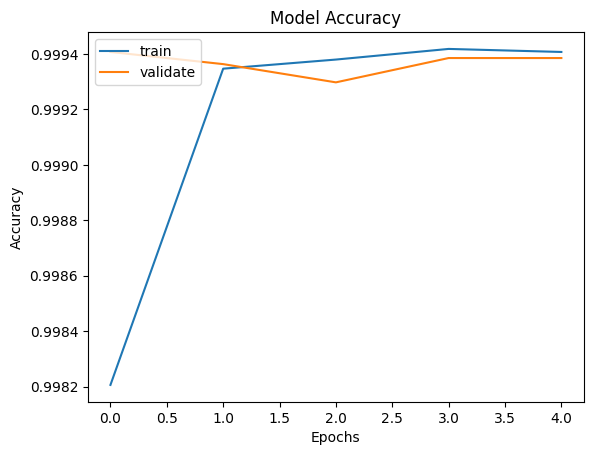

In [ ]:
# Plot accuray training dengan accuracy validation
plt.plot(run_model.history['accuracy'])
plt.plot(run_model.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train','validate'], loc='upper left')
plt.show()

Dari plot diatas, akurasi yang diperoleh cukup mudah. Tetapi data yang dimiliki tidak seimbang, karena banyak label yang bernilai 0 ('Tidak Curang'), daripada yang bernialai 1 ('Curang').

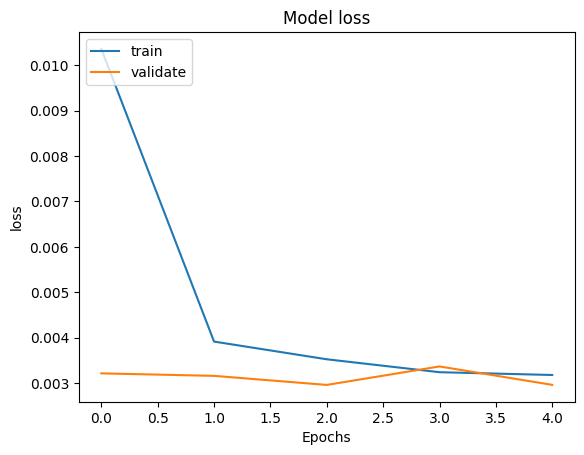

In [ ]:
# Plot loss training dengan loss validation
plt.plot(run_model.history['loss'])
plt.plot(run_model.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epochs')
plt.legend(['train','validate'], loc='upper left')
plt.show()

Kita juga melihat model tidak terjadi overfitting, karena jarak loss tidak terlalu jauh. Tetapi ingat bahwa data yang kita miliki masih belum seimbang.

# Evaluate & Predict Process

In [ ]:
# Mengevaluasi model
evaluasi = classifier.evaluate(X_test, y_test)
print('Akurasi: {:.2f}'.format(evaluasi[1]*100))

1781/1781 [==============================] - 3s 2ms/step - loss: 0.0023 - accuracy: 0.9994
Akurasi: 99.94


Kita mendapatkan nilai accuracy yang sangat tinggi, tapi nanti kita akan mengetahui karena datanya tidak seimbang, maka nilai di classification reportnya akan diberitahu bahwa data tidak seimbang.

In [ ]:
# Memprediksi test set
hasil_prediksi = classifier.predict(X_test)
hasil_prediksi = (hasil_prediksi > 0.5).astype(int)

1781/1781 [==============================] - 3s 2ms/step


In [ ]:
print(hasil_prediksi)

[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


Selanjutnya, kita akan membuat confusion matrix untuk mengetahui lebih detail informasi akurasinya

In [ ]:
# Membuat confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, hasil_prediksi)

<Axes: xlabel='Prediksi', ylabel='Aktual'>

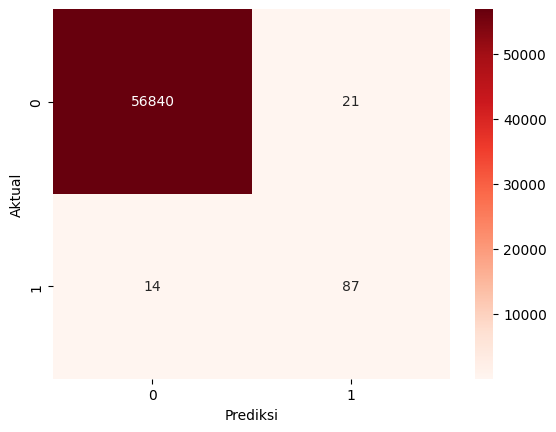

In [ ]:
# Membuat plot hasil confusion matrix
cm_label = pd.DataFrame(cm, columns=np.unique(y_test), index=np.unique(y_test))
cm_label.index.name = 'Aktual'
cm_label.columns.name = 'Prediksi'

sns.heatmap(cm_label, annot=True, cmap='Reds', fmt='g')

Dari hasil plot diatas, bisa dilihat bahwa label 0 yang diprediksi 0 berhasil sebanyak 5ribu kali, dan yang salah diprediksi sebanyak 13 kali. Dari sini sudah kelihatan bahwa data tidak seimbang, seakan-akan model lebih banyak belajar data yang berlabel 0.

In [ ]:
# Membuat clasification report
from sklearn.metrics import classification_report
jumlah_kategori = 2
target_names = ['Class {}'.format(i) for i in range(jumlah_kategori)]
print(classification_report(y_test, hasil_prediksi, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00     56861
     Class 1       0.81      0.86      0.83       101

    accuracy                           1.00     56962
   macro avg       0.90      0.93      0.92     56962
weighted avg       1.00      1.00      1.00     56962



Pada kolom support data menunjukan bahwa tidak seimbang, sehingga data lebih pintar mempelejari label 0 daripada lebal 1. Karena data terlalu banyak belajar label 0. Dikhawatirkan jika berhadapan dengan data baru yang banyak label 1, model tidak dapat memprosesnyaa.

# Under-Sampling Technique

Under-Sampling adalah mengambil secara ajak jumlah label yang bernilai 0 sebanyak jumlah label yang bernilai 1. Kebalikannya adalah Over-Sampling yaitu jumlah label 0 tetap dipertahankan dan label 1 dipakai berkali-kali sampai jumlahnya mendekati label 0, tapi kelemahannya adalah menciptakan banyak sekali data duplikasi jika label 1 nya sedikit. Untuk itu pada kasus ini, kita menggunakan Under-Sampling

In [ ]:
# Mengambil jumlah index label 1
index_fraud = np.array(data[data.Class==1].index)
n_fraud = len(index_fraud)
print(n_fraud)

492


In [ ]:
# Mengambil jumlah index label 0 secara acak berdasarkan jumlah label 1
index_no_fraud = np.array(data[data.Class==0].index)
index_data_no_fraud = np.random.choice(index_no_fraud, n_fraud, replace=False)

In [ ]:
print(len(index_data_no_fraud))

492


In [ ]:
# Menggabungkan jumlah index label 1 dan label 0
index_data_baru = np.concatenate([index_fraud, index_data_no_fraud])
data_baru = data.iloc[index_data_baru,:]

In [ ]:
print(data_baru.shape)
data_baru.head()

(984, 32)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Standard
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1,-0.353229
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1,1.761758
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1,0.606031
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1,-0.117342
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1,-0.349231


# Train Test Split

In [ ]:
# Mendefinisikan variabel dependen (y)
y_baru = np.array(data_baru.iloc[:, -2])

# Mendefinisikan variabel independen (X)
X_baru = np.array(data_baru.drop(['Time','Amount','Class'], axis=1))

In [ ]:
# Membagi train dan test set
X_train2, X_test_final, y_train2, y_test_final = train_test_split(X_baru, y_baru,
                                                                  test_size=0.1,
                                                                  random_state=111)

X_test_final dan y_test_final akan gunakan untuk mengtest model kita pada data yang sudah seimbang nantinya. Selanjutnya kita akan membagi lagi training set ke dalam test set dan validate set.

In [ ]:
# Membagi train dan test set
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_train2, y_train2,
                                                                  test_size=0.1,
                                                                  random_state=111)

In [ ]:
# Membagi train dan validate set
X_train2, X_validate2, y_train2, y_validate2 = train_test_split(X_train2, y_train2,
                                                                  test_size=0.2,
                                                                  random_state=111)

Jadi model yang sudah seimbang nanti, di validasi di validate2, dan diuji test2. Namun apakah kita yakin model kita sudah bagus? Maka untuk mengujinya kita uji pada dataset final. Lalu kita dapat membandingkan akurasi data yang seimbang dan tidak seimbang nantinya.

# Create Model with Data Balanced

In [ ]:
# Mendefinisikan objek model, kode ini ada di sub Create Model Structure
classifier2 = Sequential()
classifier2.add(Dense(units=16, input_dim=29, activation='relu'))
classifier2.add(Dense(24, activation='relu'))
classifier2.add(Dropout(0.25))
classifier2.add(Dense(20, activation='relu'))
classifier2.add(Dense(24, activation='relu'))
classifier2.add(Dense(1, activation='sigmoid'))
classifier2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
classifier2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 16)                480       
                                                                 
 dense_16 (Dense)            (None, 24)                408       
                                                                 
 dropout_3 (Dropout)         (None, 24)                0         
                                                                 
 dense_17 (Dense)            (None, 20)                500       
                                                                 
 dense_18 (Dense)            (None, 24)                504       
                                                                 
 dense_19 (Dense)            (None, 1)                 25        
                                                                 
Total params: 1917 (7.49 KB)
Trainable params: 1917 (7

# Training Process Data Balanced

In [ ]:
# Proses Training
run_model2 = classifier2.fit(X_train2, y_train2, batch_size=8,
                           epochs=5, verbose=1, validation_data=(X_validate2, y_validate2))

Epoch 1/5
80/80 [==============================] - 2s 6ms/step - loss: 0.4761 - accuracy: 0.7547 - val_loss: 0.3736 - val_accuracy: 0.9125
Epoch 2/5
80/80 [==============================] - 0s 4ms/step - loss: 0.3223 - accuracy: 0.9135 - val_loss: 0.2751 - val_accuracy: 0.9250
Epoch 3/5
80/80 [==============================] - 0s 3ms/step - loss: 0.2530 - accuracy: 0.9292 - val_loss: 0.2382 - val_accuracy: 0.9125
Epoch 4/5
80/80 [==============================] - 0s 4ms/step - loss: 0.2105 - accuracy: 0.9324 - val_loss: 0.2264 - val_accuracy: 0.9125
Epoch 5/5
80/80 [==============================] - 0s 5ms/step - loss: 0.1725 - accuracy: 0.9513 - val_loss: 0.2235 - val_accuracy: 0.9125


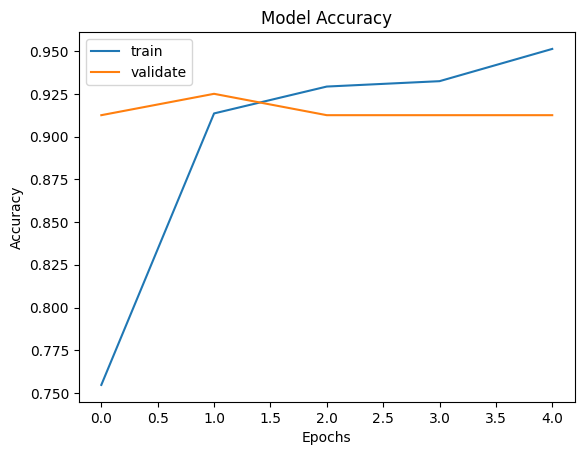

In [ ]:
# Plot accuray training dengan accuracy validation
plt.plot(run_model2.history['accuracy'])
plt.plot(run_model2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train','validate'], loc='upper left')
plt.show()

Hasil akurasi agak sedikit menurun, tapi itu bukan masalah karena sekarang data kita sudah balance dan model sudah belajar dengan benar.

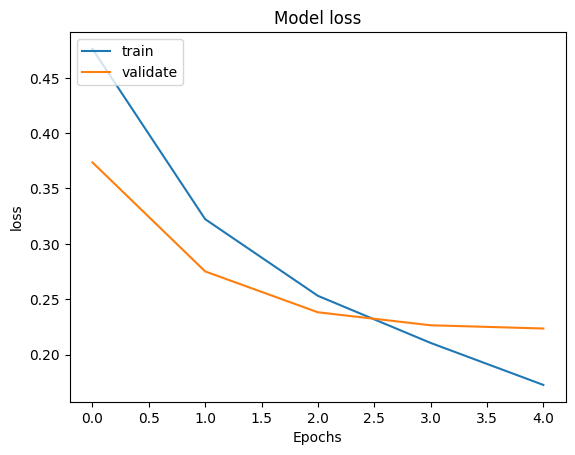

In [ ]:
# Plot loss training dengan loss validation
plt.plot(run_model2.history['loss'])
plt.plot(run_model2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epochs')
plt.legend(['train','validate'], loc='upper left')
plt.show()

# Evaluate & Predict Process

In [ ]:
# Mengevaluasi model
evaluasi2 = classifier2.evaluate(X_test2, y_test2)
print('Akurasi: {:.2f}'.format(evaluasi2[1]*100))

3/3 [==============================] - 0s 5ms/step - loss: 0.2461 - accuracy: 0.8876
Akurasi: 88.76


Hasil akurasi pada data yang balance masih bagus

In [ ]:
# Memprediksi test set
hasil_prediksi2 = classifier2.predict(X_test2)
hasil_prediksi2 = (hasil_prediksi2 > 0.5).astype(int)

3/3 [==============================] - 0s 8ms/step


<Axes: xlabel='Prediksi', ylabel='Aktual'>

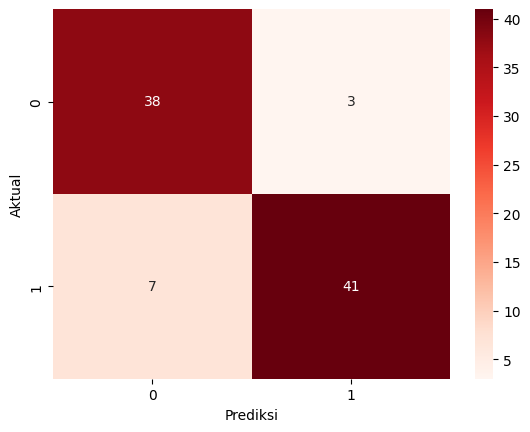

In [ ]:
# Membuat confusion matrix
cm2 = confusion_matrix(y_test2, hasil_prediksi2)

# Membuat plot hasil confusion matrix
cm_label2 = pd.DataFrame(cm2, columns=np.unique(y_test2), index=np.unique(y_test2))
cm_label2.index.name = 'Aktual'
cm_label2.columns.name = 'Prediksi'
sns.heatmap(cm_label2, annot=True, cmap='Reds', fmt='g')

Hasil dari confusion matrix juga masih sangat baik.

In [ ]:
jumlah_kategori = 2
target_names = ['Class {}'.format(i) for i in range(jumlah_kategori)]
print(classification_report(y_test2, hasil_prediksi2, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.84      0.93      0.88        41
     Class 1       0.93      0.85      0.89        48

    accuracy                           0.89        89
   macro avg       0.89      0.89      0.89        89
weighted avg       0.89      0.89      0.89        89



Hasil classification report menunjukan hasil yang bagus pada data yang sudah balance.

# Predict Test Set Final

Kita akan memeriksa lagi apakah model yang sudah kita evaluasi dan kita uji sudah cukup baik jika bertemu dengan data yang tidak pernah dilihat atau asing.

In [ ]:
# Memprediksi test set
hasil_prediksi3 = classifier2.predict(X_test_final)
hasil_prediksi3 = (hasil_prediksi3 > 0.5).astype(int)

4/4 [==============================] - 0s 8ms/step


<Axes: xlabel='Prediksi', ylabel='Aktual'>

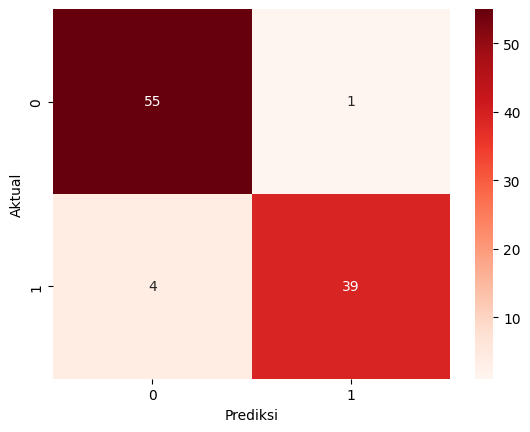

In [ ]:
# Membuat confusion matrix
cm3 = confusion_matrix(y_test_final, hasil_prediksi3)

# Membuat plot hasil confusion matrix
cm_label3 = pd.DataFrame(cm3, columns=np.unique(y_test_final), index=np.unique(y_test_final))
cm_label3.index.name = 'Aktual'
cm_label3.columns.name = 'Prediksi'
sns.heatmap(cm_label3, annot=True, cmap='Reds', fmt='g')

In [ ]:
jumlah_kategori = 2
target_names = ['Class {}'.format(i) for i in range(jumlah_kategori)]
print(classification_report(y_test_final, hasil_prediksi3, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.93      0.98      0.96        56
     Class 1       0.97      0.91      0.94        43

    accuracy                           0.95        99
   macro avg       0.95      0.94      0.95        99
weighted avg       0.95      0.95      0.95        99



Model data kita yang sudah balance, ternyata mampu memprediksi data di dunia nyata, atau data yang belum pernah dilihat sebelumnya. Maka model kita sudah ready untuk di deploy di cloud, atau secara offline.